In [1]:
#level 3

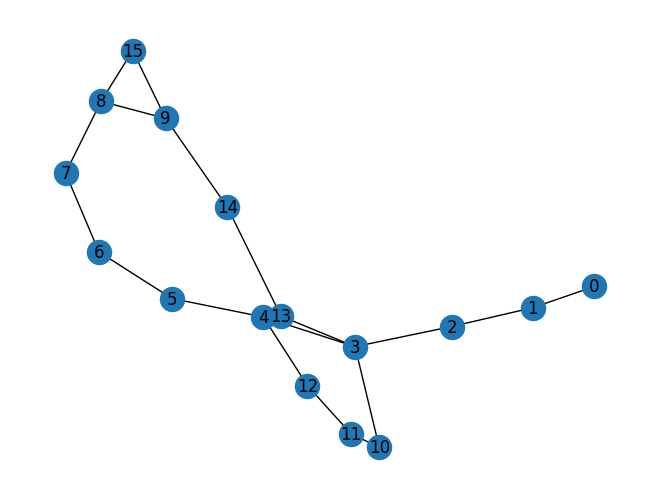

In [5]:
import networkx as nx
import random
import matplotlib.pyplot as plt

def add_paths(graph, a, n):
    used_lengths = set()

    for x in range(a):
        #weight the connection toward connecting to end node
        if random.random() < 0.4:
          elements = random.sample([x for x in range(n)], k=2)
        else:
          elements = random.sample([x for x in range(n)], k = 1) + [9]
        elements.sort()  

        #don't repeat connection lengths(higher chance of multiple shortest)
        while True:
            num_nodes = random.randint(1, n-5)
            if num_nodes not in used_lengths:
                used_lengths.add(num_nodes)
                break

        start_node = elements[0]
        # add the connection
        for i in range(num_nodes):
            new_node = max(graph.nodes) + 1
            graph.add_edge(start_node, new_node)
            start_node = new_node

        # connect back to the end element
        if num_nodes > 0:
            graph.add_edge(start_node, elements[1])

    return graph

size_of_graph = 10
repeats = 3

graph = nx.path_graph(size_of_graph)
graph = add_paths(graph, repeats, size_of_graph)

nx.draw(graph, with_labels=True)

In [4]:
graph.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19))

{}

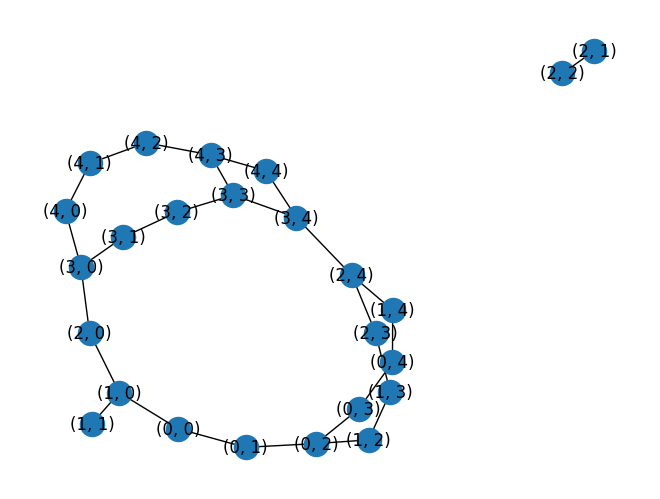

In [121]:
#level 5
import networkx as nx
import random
import matplotlib.pyplot as plt

n = 5
graph = nx.grid_2d_graph(n,n)

start, end = (0, 0), (n-1,n-1)

#generate all shortest paths and simple paths
all_shortest_paths = list(nx.all_shortest_paths(graph, start, end))[0]
all_other_paths = list(nx.all_simple_paths(graph, start, end))

#only keep simple paths that are longer than shortest path
shortest_path_length = len(all_shortest_paths)
all_other_paths = [path for path in all_other_paths if len(path) > shortest_path_length]

#select 4 random simple paths
kept_paths = random.sample(all_other_paths, random.randint(3,5))

#convert lists into correct format
kept_paths_edges = {(path[i], path[i+1]) for path in kept_paths for i in range(len(path) - 1)}
shortest_path_edges = {(all_shortest_paths[i], all_shortest_paths[i+1]) for i in range(len(all_shortest_paths) - 1)}

all_paths = kept_paths_edges | shortest_path_edges

#remove edges
for edge in list(graph.edges):
    if edge not in kept_paths_edges:
        graph.remove_edge(*edge)
#         if not nx.is_connected(graph):
#             graph.add_edge(*edge)

# a = list(nx.all_simple_paths(graph, start, end))
# print(a, len(a))
# Assign weights
# for edge in shortest_path_edges:
#     if graph.has_edge(edge[0], edge[1]):
#         graph[edge[0]][edge[1]]['weight'] = random.randint(1,3)

# for edge in kept_paths_edges - shortest_path_edges:
#     if graph.has_edge(edge[0], edge[1]):
#         graph[edge[0]][edge[1]]['weight'] = random.randint(3,6)

#visualize it with edge labels showing weights
pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels=True)
labels = nx.get_edge_attributes(graph, 'weight')
nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels)

In [124]:
for node in graph.nodes: print(node)

(0, 0)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(1, 0)
(1, 1)
(1, 2)
(1, 3)
(1, 4)
(2, 0)
(2, 1)
(2, 2)
(2, 3)
(2, 4)
(3, 0)
(3, 1)
(3, 2)
(3, 3)
(3, 4)
(4, 0)
(4, 1)
(4, 2)
(4, 3)
(4, 4)


In [109]:
a = set([1,2,3,4])
b = set([1, 5,6,7])
a|b

{1, 2, 3, 4, 5, 6, 7}

# jumbling the nodes

In [ ]:
import numpy as np

def rename_adjacency_matrix(matrix, mapping):
    """
    Rename the nodes in the adjacency matrix based on a given mapping.
    """
    # Convert mapping to permutation
    n = matrix.shape[0]
    permutation = list(range(n))
    for original, renamed in mapping.items():
        permutation[original] = renamed

    # Adjust rows and columns based on the permutation
    temp_matrix = matrix[permutation]
    renamed_matrix = temp_matrix[:, permutation]
    
    return renamed_matrix

# Example:
original_matrix = np.array([
    [0, 1, 0, 0],
    [1, 0, 1, 0],
    [0, 1, 0, 1],
    [0, 0, 1, 0]
])

# Say the renaming is A->A, B->D, C->B, D->C. In 0-indexing, this is: {0: 0, 1: 3, 2: 1, 3: 2}
mapping = {0: 0, 1: 3, 2: 1, 3: 2}

new_matrix = rename_adjacency_matrix(original_matrix, mapping)
print(new_matrix)


In [13]:
import random

shuffled_list = sorted(list(range(len(adj_array))), key=lambda x: random.random())


In [14]:
adj_array

array([[0, 1, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [0, 1, 0, 1, 0, 0],
       [0, 0, 1, 0, 1, 0],
       [0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 1, 0]])

In [15]:
shuffled_list

[3, 0, 4, 2, 1, 5]

In [16]:
mapping= {i: shuffled_list[i] for i in range(len(adj_array))}
mapping

{0: 3, 1: 0, 2: 4, 3: 2, 4: 1, 5: 5}

In [21]:
def rename_adjacency_matrix(matrix, mapping):
    """
    Rename the nodes in the adjacency matrix based on a given mapping.
    """
    # Convert mapping to permutation
    n = matrix.shape[0]
    permutation = list(range(n))
    for original, renamed in mapping.items():
        permutation[original] = renamed

    # Adjust rows and columns based on the permutation
    temp_matrix = matrix[permutation]
    renamed_matrix = temp_matrix[:, permutation]
    
    return renamed_matrix

# Example:
original_matrix = np.array([
        [0, 1, 0, 0],
        [1, 0, 1, 0],
        [0, 1, 0, 1],
        [0, 0, 1, 0]
    ])

    # Say the renaming is A->A, B->D, C->B, D->C. In 0-indexing, this is: {0: 0, 1: 3, 2: 1, 3: 2}
mapping = {0: 0, 1: 3, 2: 1, 3: 2}

new_matrix = rename_adjacency_matrix(original_matrix, mapping)
print(new_matrix)


[[0 0 1 0]
 [0 0 0 1]
 [1 0 0 1]
 [0 1 1 0]]


In [18]:
rename_adjacency_matrix(adj_array, mapping)

array([[0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 1, 0],
       [0, 1, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0]])